Mounted at /content/drive/
Cameraman 1: 

Magnitude: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Angle: [[-3.14159265  2.10890294 -1.93857352 ...  0.43951421  1.93857352
  -2.10890294]
 [ 1.66974353 -2.45066087 -0.90769046 ...  1.68056331  2.95759358
  -1.50915254]
 [-2.82320852 -2.65104844  0.31868674 ... -1.00905838  2.86002229
   0.09759344]
 ...
 [ 2.1730782  -1.93333526  0.00557562 ... -0.43184036  2.94591224
   0.25074855]
 [ 2.82320852 -0.09759344 -2.86002229 ... -2.98133123 -0.31868674
   2.65104844]
 [-1.66974353  1.50915254 -2.95759358 ... -0.10524522  0.90769046
   2.45066087]]


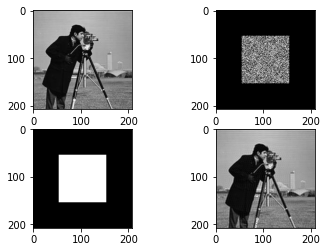

In [13]:
# PA01: Image Enhancement
# Written by: Marwin B. Alejo 2020-20221
# February 23, 2022
#
# Item 7 Requirement: 
# Verify Fourier Transform Rotation Properties

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


def fourier(img):
    dft = np.fft.fft2(np.float32(img))
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def inverse_fourier(mag, ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty).astype(np.uint8)
    return imgCombined

img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/cameraman1.jpg', 0) #alter cameraman#
mag, ang = fourier(img)
mask = np.zeros(img.shape, dtype=img.dtype)
y,x = mask.shape[0], mask.shape[1]
cx = x//2
cy = y//2

mask[cy-50 : cy+50, cx-50 : cx+50] = 1.
mag = mag * mask
res = inverse_fourier(mag, ang)

mx = np.amax(np.log(mag+0.001))
tmp = np.uint8(255*(mag/mx))

# mag2, ang2 = cv2.cartToPolar(cx, cy, True)
print("Cameraman 1: \n\nMagnitude: " + str(mag) + "\n\nAngle: " + str(ang))
_, ax = plt.subplots(2,2)
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(tmp, cmap='gray')
ax[1,0].imshow(mask, cmap='gray')
ax[1,1].imshow(res, cmap='gray')
plt.show()

Mounted at /content/drive/
Cameraman 2: 

Magnitude: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Angle: [[-1.53039974e-14 -6.70292437e-01 -8.91592387e-01 ... -2.52982321e+00
   8.91592387e-01  6.70292437e-01]
 [-1.23928319e+00 -2.31163417e+00  2.05556033e+00 ...  1.43263299e+00
   3.05885214e-01 -1.02430656e+00]
 [-2.98196853e+00  4.76566424e-01  4.75107366e-01 ...  2.07519415e+00
   3.07319290e+00  3.04907472e+00]
 ...
 [-8.54076839e-01 -1.80612023e+00 -2.69971706e+00 ... -5.42770553e-01
  -1.84776919e-01  1.22135909e-01]
 [ 2.98196853e+00 -3.04907472e+00 -3.07319290e+00 ...  4.51464709e-02
  -4.75107366e-01 -4.76566424e-01]
 [ 1.23928319e+00  1.02430656e+00 -3.05885214e-01 ... -1.03809647e-01
  -2.05556033e+00  2.31163417e+00]]


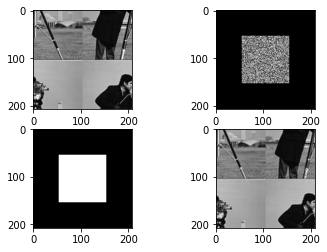

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


def fourier(img):
    dft = np.fft.fft2(np.float32(img))
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def inverse_fourier(mag, ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty).astype(np.uint8)
    return imgCombined

img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/cameraman2.jpg', 0)
mag, ang = fourier(img)
mask = np.zeros(img.shape, dtype=img.dtype)
y,x = mask.shape[0], mask.shape[1]
cx = x//2
cy = y//2

mask[cy-50 : cy+50, cx-50 : cx+50] = 1.
mag = mag * mask
res = inverse_fourier(mag, ang)

mx = np.amax(np.log(mag+0.001))
tmp = np.uint8(255*(mag/mx))

print("Cameraman 2: \n\nMagnitude: " + str(mag) + "\n\nAngle: " + str(ang))
_, ax = plt.subplots(2,2)
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(tmp, cmap='gray')
ax[1,0].imshow(mask, cmap='gray')
ax[1,1].imshow(res, cmap='gray')
plt.show()

Mounted at /content/drive/
Cameraman 3: 

Magnitude: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Angle: [[ 3.14159265 -1.56000132  0.52598897 ... -1.41122684 -0.52598897
   1.56000132]
 [ 0.14383615  0.8592954   1.84599921 ... -2.10072593 -3.06614493
  -1.57726339]
 [ 1.87294275 -2.34209823 -0.12526724 ... -0.29655969  0.64094524
   1.02626127]
 ...
 [ 0.80066852  1.64701757  2.90380135 ... -2.23979145 -1.07576492
  -0.20770137]
 [-1.87294275 -1.02626127 -0.64094524 ... -1.11826942  0.12526724
   2.34209823]
 [-0.14383615  1.57726339  3.06614493 ... -1.49354712 -1.84599921
  -0.8592954 ]]


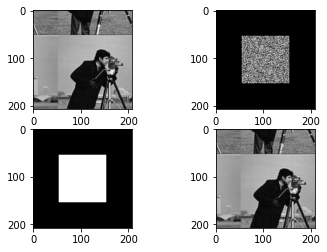

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


def fourier(img):
    dft = np.fft.fft2(np.float32(img))
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def inverse_fourier(mag, ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty).astype(np.uint8)
    return imgCombined

img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/cameraman3.jpg', 0)
mag, ang = fourier(img)
mask = np.zeros(img.shape, dtype=img.dtype)
y,x = mask.shape[0], mask.shape[1]
cx = x//2
cy = y//2

mask[cy-50 : cy+50, cx-50 : cx+50] = 1.
mag = mag * mask
res = inverse_fourier(mag, ang)

mx = np.amax(np.log(mag+0.001))
tmp = np.uint8(255*(mag/mx))

# mag2, ang2 = cv2.cartToPolar(cx, cy, True)
print("Cameraman 3: \n\nMagnitude: " + str(mag) + "\n\nAngle: " + str(ang))
_, ax = plt.subplots(2,2)
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(tmp, cmap='gray')
ax[1,0].imshow(mask, cmap='gray')
ax[1,1].imshow(res, cmap='gray')
plt.show()

Mounted at /content/drive/
Cameraman 4: 

Magnitude: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Angle: [[ 4.14483263e-16 -1.34678139e+00  6.11151096e-01 ... -1.00547948e+00
  -6.11151096e-01  1.34678139e+00]
 [ 4.44381727e-01  2.11609715e+00  2.98170947e+00 ... -3.05616998e+00
  -6.90132964e-01 -8.69083781e-01]
 [-1.30970272e+00 -9.69506808e-02 -1.28400065e+00 ... -1.05533400e-01
   2.77720689e+00 -2.25142843e+00]
 ...
 [ 2.39196704e+00 -3.02498729e+00  2.50185039e-01 ... -9.02049273e-01
  -1.92769973e+00  1.71862321e+00]
 [ 1.30970272e+00  2.25142843e+00 -2.77720689e+00 ...  2.91609276e+00
   1.28400065e+00  9.69506808e-02]
 [-4.44381727e-01  8.69083781e-01  6.90132964e-01 ...  9.83490114e-01
  -2.98170947e+00 -2.11609715e+00]]


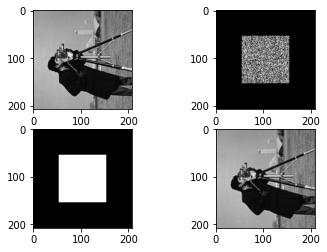

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


def fourier(img):
    dft = np.fft.fft2(np.float32(img))
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def inverse_fourier(mag, ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty).astype(np.uint8)
    return imgCombined

img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/cameraman4.jpg', 0)
mag, ang = fourier(img)
mask = np.zeros(img.shape, dtype=img.dtype)
y,x = mask.shape[0], mask.shape[1]
cx = x//2
cy = y//2

mask[cy-50 : cy+50, cx-50 : cx+50] = 1.
mag = mag * mask
res = inverse_fourier(mag, ang)

mx = np.amax(np.log(mag+0.001))
tmp = np.uint8(255*(mag/mx))

# mag2, ang2 = cv2.cartToPolar(cx, cy, True)
print("Cameraman 4: \n\nMagnitude: " + str(mag) + "\n\nAngle: " + str(ang))
_, ax = plt.subplots(2,2)
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(tmp, cmap='gray')
ax[1,0].imshow(mask, cmap='gray')
ax[1,1].imshow(res, cmap='gray')
plt.show()